In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re
nltk.download('stopwords')
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report,ConfusionMatrixDisplay

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
file_path = './dataset_phishing.csv'  # Ensure this file exists in the working directory
df = pd.read_csv(file_path)
print(df.head(10))

                                                 url  length_url  \
0              http://www.crestonwood.com/router.php          37   
1  http://shadetreetechnology.com/V4/validation/a...          77   
2  https://support-appleld.com.secureupdate.duila...         126   
3                                 http://rgipt.ac.in          18   
4  http://www.iracing.com/tracks/gateway-motorspo...          55   
5                   http://appleid.apple.com-app.es/          32   
6                                http://www.mutuo.it          19   
7  http://www.shadetreetechnology.com/V4/validati...          81   
8         http://vamoaestudiarmedicina.blogspot.com/          42   
9  https://parade.com/425836/joshwigler/the-amazi...         104   

   length_hostname  ip  nb_dots  nb_hyphens  nb_at  nb_qm  nb_and  nb_or  ...  \
0               19   0        3           0      0      0       0      0  ...   
1               23   1        1           0      0      0       0      0  ...   
2       

In [3]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['labels'] = label_encoder.fit_transform(df['status'])

In [4]:
print(df[['status', 'labels']].head(10))

       status  labels
0  legitimate       0
1    phishing       1
2    phishing       1
3  legitimate       0
4  legitimate       0
5    phishing       1
6  legitimate       0
7    phishing       1
8  legitimate       0
9  legitimate       0


In [5]:
Y1 = df['labels']
X1 = df.drop(columns=['url', 'labels', 'status'])

In [6]:
X1.head(2)

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank
0,37,19,0,3,0,0,0,0,0,0,...,0,0,1,0,45,-1,0,1,1,4
1,77,23,1,1,0,0,0,0,0,0,...,0,1,0,0,77,5767,0,0,1,2


In [7]:
Y1.head(2)

,labels
0,0
1,1


In [8]:
X2 = df['url']
print(X2.head(2))

0                http://www.crestonwood.com/router.php
1    http://shadetreetechnology.com/V4/validation/a...
Name: url, dtype: object


In [9]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(
    X1,
    Y1,
    stratify=Y1,
    test_size=0.2,
    random_state=42
)

In [10]:
X_train1 = np.expand_dims(X_train1, axis=-1)
X_test1 = np.expand_dims(X_test1, axis=-1)
print(X_train1.shape)

(9144, 87, 1)


In [11]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [12]:
ps = PorterStemmer()
corpus_train = []

def albumentations(X, corpus_t):
    for i in range(len(X)):
        print(f"{i} / {len(X)}")
        review = re.sub(r"[^a-zA-Z]", " ", X[i].decode("utf-8") if isinstance(X[i], bytes) else str(X[i]))
        review = review.lower()
        review = review.split()

        review = [
            ps.stem(word)
            for word in review
            if word not in set(stopwords.words("english"))
        ]
        review = " ".join(review)
        corpus_t.append(review)
albumentations(X2, corpus_train)

Streaming output truncated to the last 5000 lines.
6430 / 11430
6431 / 11430
6432 / 11430
6433 / 11430
6434 / 11430
6435 / 11430
6436 / 11430
6437 / 11430
6438 / 11430
6439 / 11430
6440 / 11430
6441 / 11430
6442 / 11430
6443 / 11430
6444 / 11430
6445 / 11430
6446 / 11430
6447 / 11430
6448 / 11430
6449 / 11430
6450 / 11430
6451 / 11430
6452 / 11430
6453 / 11430
6454 / 11430
6455 / 11430
6456 / 11430
6457 / 11430
6458 / 11430
6459 / 11430
6460 / 11430
6461 / 11430
6462 / 11430
6463 / 11430
6464 / 11430
6465 / 11430
6466 / 11430
6467 / 11430
6468 / 11430
6469 / 11430
6470 / 11430
6471 / 11430
6472 / 11430
6473 / 11430
6474 / 11430
6475 / 11430
6476 / 11430
6477 / 11430
6478 / 11430
6479 / 11430
6480 / 11430
6481 / 11430
6482 / 11430
6483 / 11430
6484 / 11430
6485 / 11430
6486 / 11430
6487 / 11430
6488 / 11430
6489 / 11430
6490 / 11430
6491 / 11430
6492 / 11430
6493 / 11430
6494 / 11430
6495 / 11430
6496 / 11430
6497 / 11430
6498 / 11430
6499 / 11430
6500 / 11430
6501 / 11430
6502 / 11430


In [13]:
corpus_train[:4]

['http www crestonwood com router php',
 'http shadetreetechnolog com v valid aedc ae eabcfa e',
 'http support appleld com secureupd duilawyeryork com ap e b b b cmd updat dispatch e b b b b local',
 'http rgipt ac']

In [14]:
cv = TfidfVectorizer(max_features=1000)
X2 = cv.fit_transform(corpus_train).toarray()

In [15]:
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(
    X2,
    Y1,
    stratify=Y1,
    test_size=0.2,
    random_state=42
)

In [16]:
X_train2 = np.expand_dims(X_train2, axis=-1)
X_test2 = np.expand_dims(X_test2, axis=-1)
print(f"Training features shape: {X_train2.shape}, Training labels shape: {Y_train2.shape}")
print(f"Testing features shape: {X_test2.shape}, Testing labels shape: {Y_test2.shape}")

Training features shape: (9144, 1000, 1), Training labels shape: (9144,)
Testing features shape: (2286, 1000, 1), Testing labels shape: (2286,)


In [17]:
input_size1 = X_train1[1].shape
input_size2 = X_train2[2].shape
input_size1, input_size2

((87, 1), (1000, 1))

In [18]:
def eval_graph(results):
    acc = results.history['accuracy']
    val_acc = results.history['val_accuracy']
    epochs = range(len(acc))
    plt.figure(figsize=(14, 7))
    plt.plot(epochs, acc, 'r', label="Training Accuracy")
    plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
    plt.legend(loc='upper left')
    plt.title("Accuracy Graph")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.show()
    loss = results.history['loss']
    val_loss = results.history['val_loss']
    epochs = range(len(loss))
    plt.figure(figsize=(14, 7))
    plt.plot(epochs, loss, 'r', label="Training Loss")
    plt.plot(epochs, val_loss, 'b', label="Validation Loss")
    plt.legend(loc='upper left')
    plt.title("Loss Graph")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.show()

In [19]:
def conf_matrix(X_test, Y_test, model):
    Y_pred = model.predict(X_test)
    Y_pred = (Y_pred > 0.5)
    cm = confusion_matrix(Y_test, Y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.YlGn)
    plt.title('Confusion Matrix')
    plt.show()

In [20]:
from keras import Sequential

def CNN(input_size):
    model = Sequential()
    model.add(layers.Input(shape=input_size))
    model.add(layers.Conv1D(filters=16, kernel_size=3, activation='relu', padding='same'))
    model.add(layers.Dropout(0.2))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling1D(pool_size=2, padding='same'))

    model.add(layers.Conv1D(filters=32, kernel_size=3, activation='relu', padding='same'))
    model.add(layers.Dropout(0.2))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling1D(pool_size=2, padding='same'))

    model.add(layers.Conv1D(filters=64, kernel_size=3, activation='relu', padding='same'))
    model.add(layers.Dropout(0.2))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling1D(pool_size=2, padding='same'))

    model.add(layers.Conv1D(filters=128, kernel_size=3, activation='relu', padding='same'))
    model.add(layers.Dropout(0.2))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling1D(pool_size=2, padding='same'))

    model.add(layers.Conv1D(filters=256, kernel_size=3, activation='relu', padding='same'))
    model.add(layers.Dropout(0.2))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling1D(pool_size=2, padding='same'))
    model.add(layers.Flatten())
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(1, activation='sigmoid'))

    return model
CNN_model1 = CNN(input_size1)
CNN_model2 = CNN(input_size2)
CNN_model1.summary()
CNN_model2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 87, 16)              │              64 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 87, 16)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 87, 16)              │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 44, 16)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 44, 32)              │           1,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 44, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 44, 32)              │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 22, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 22, 64)              │           6,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 22, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 22, 64)              │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ (None, 11, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_3 (Conv1D)                    │ (None, 11, 128)             │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 11, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 11, 128)             │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_3 (MaxPooling1D)       │ (None, 6, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_4 (Conv1D)                    │ (None, 6, 256)              │          98,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 6, 256)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 6, 256)              │           1,024 │
│ (BatchNormalization)                 │                             │              

 Total params: 527,329 (2.01 MB)

 Trainable params: 526,337 (2.01 MB)

 Non-trainable params: 992 (3.88 KB)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_5 (Conv1D)                    │ (None, 1000, 16)            │              64 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 1000, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 1000, 16)            │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_5 (MaxPooling1D)       │ (None, 500, 16)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_6 (Conv1D)                    │ (None, 500, 32)             │           1,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 500, 32)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 500, 32)             │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_6 (MaxPooling1D)       │ (None, 250, 32)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_7 (Conv1D)                    │ (None, 250, 64)             │           6,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 250, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 250, 64)             │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_7 (MaxPooling1D)       │ (None, 125, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_8 (Conv1D)                    │ (None, 125, 128)            │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 125, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 125, 128)            │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_8 (MaxPooling1D)       │ (None, 63, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_9 (Conv1D)                    │ (None, 63, 256)             │          98,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 63, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 63, 256)             │           1,024 │
│ (BatchNormalization)                 │                             │              

 Total params: 4,328,417 (16.51 MB)

 Trainable params: 4,327,425 (16.51 MB)

 Non-trainable params: 992 (3.88 KB)

In [21]:
# Compile the CNN model
CNN_model1.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

# Define callbacks for model checkpointing and early stopping
callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        filepath='CNN_MODEL_ON_FEATURE_EXTRACTED.keras',  # Updated extension
        verbose=1,
        save_best_only=True
    ),
    tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        min_delta=0.001,
        patience=30,
        verbose=1
    )
]

# Train the CNN model
CNN_results_1 = CNN_model1.fit(
    X_train1,
    Y_train1,
    validation_split=0.2,
    batch_size=128,
    epochs=200,
    callbacks=callbacks
)

Epoch 1/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - accuracy: 0.5778 - loss: 0.8680
Epoch 1: val_loss improved from inf to 0.68360, saving model to CNN_MODEL_ON_FEATURE_EXTRACTED.keras
58/58 ━━━━━━━━━━━━━━━━━━━━ 25s 164ms/step - accuracy: 0.5785 - loss: 0.8668 - val_accuracy: 0.5189 - val_loss: 0.6836
Epoch 2/200
45/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6918 - loss: 0.6932
Epoch 2: val_loss did not improve from 0.68360
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6957 - loss: 0.6779 - val_accuracy: 0.5347 - val_loss: 0.7161
Epoch 3/200
49/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7233 - loss: 0.5553
Epoch 3: val_loss did not improve from 0.68360
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7261 - loss: 0.5510 - val_accuracy: 0.5276 - val_loss: 0.7183
Epoch 4/200
52/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7699 - loss: 0.5004
Epoch 4: val_loss did not improve from 0.68360
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7690 - loss: 0.

In [22]:
evaluation_results = CNN_model1.evaluate(X_test1, Y_test1, verbose=1)

72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8291 - loss: 0.4055


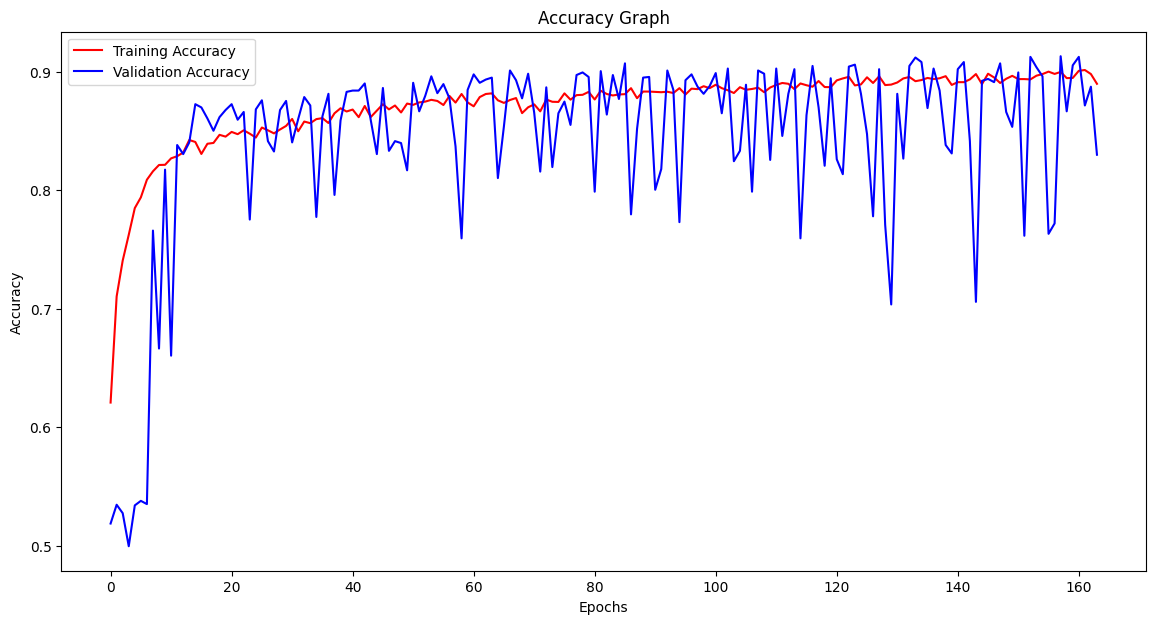

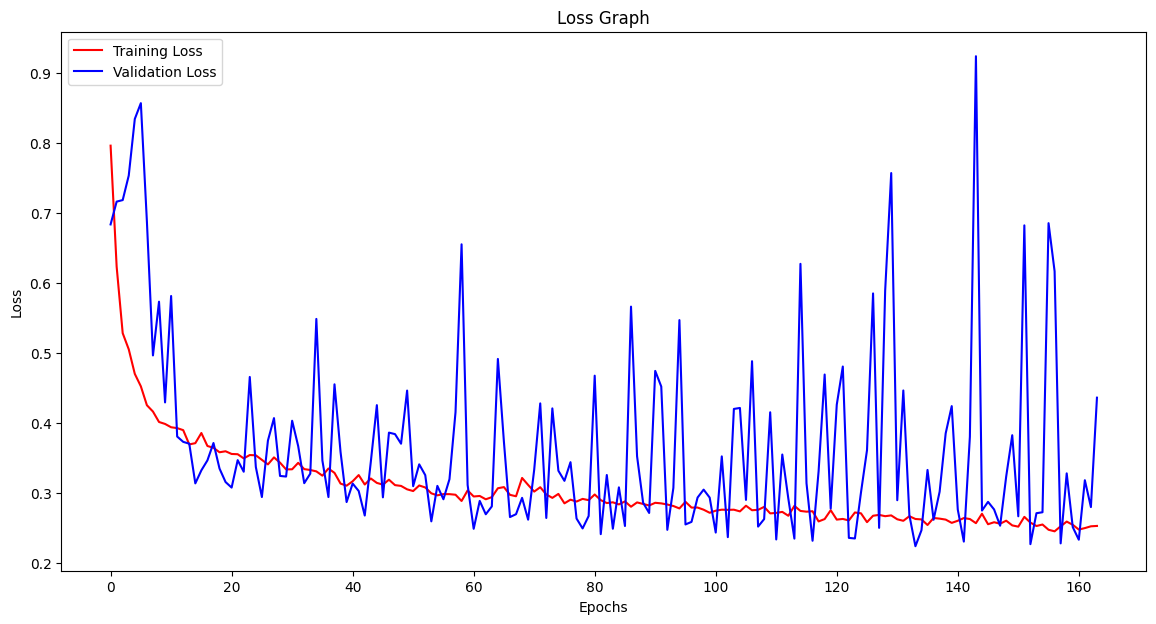

In [23]:
eval_graph(CNN_results_1)

In [24]:
Y_test1

,labels
6172,1
9810,1
8537,1
605,1
6549,0
...,...
4104,0
6374,0
6232,0
3950,0


72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


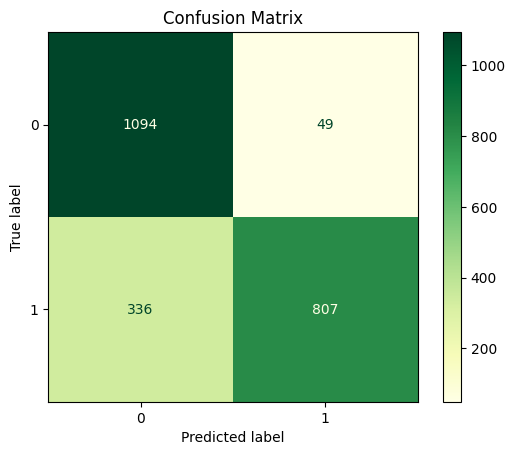

In [25]:
conf_matrix(X_test1,Y_test1,CNN_model1)

In [26]:
CNN_model2.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])
callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        filepath='CNN_MODEL_ON_NON_FEATURE_EXTRACTED.keras',
        verbose=1,
        save_best_only=True
    ),
    tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        min_delta=0.001,
        patience=30,
        verbose=1
    )
]
CNN_results_2 = CNN_model2.fit(
    X_train2,
    Y_train2,
    validation_split=0.2,
    batch_size=128,
    epochs=200,
    callbacks=callbacks
)

Epoch 1/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step - accuracy: 0.6884 - loss: 1.1207
Epoch 1: val_loss improved from inf to 0.69142, saving model to CNN_MODEL_ON_NON_FEATURE_EXTRACTED.keras
58/58 ━━━━━━━━━━━━━━━━━━━━ 27s 226ms/step - accuracy: 0.6890 - loss: 1.1146 - val_accuracy: 0.5894 - val_loss: 0.6914
Epoch 2/200
55/58 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7812 - loss: 0.4830
Epoch 2: val_loss improved from 0.69142 to 0.68810, saving model to CNN_MODEL_ON_NON_FEATURE_EXTRACTED.keras
58/58 ━━━━━━━━━━━━━━━━━━━━ 20s 20ms/step - accuracy: 0.7819 - loss: 0.4817 - val_accuracy: 0.4964 - val_loss: 0.6881
Epoch 3/200
56/58 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8224 - loss: 0.3989
Epoch 3: val_loss improved from 0.68810 to 0.68106, saving model to CNN_MODEL_ON_NON_FEATURE_EXTRACTED.keras
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8223 - loss: 0.3992 - val_accuracy: 0.6441 - val_loss: 0.6811
Epoch 4/200
56/58 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8

In [27]:
evaluation_results_2 = CNN_model2.evaluate(X_test2, Y_test2, verbose=1)

72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9220 - loss: 0.2248


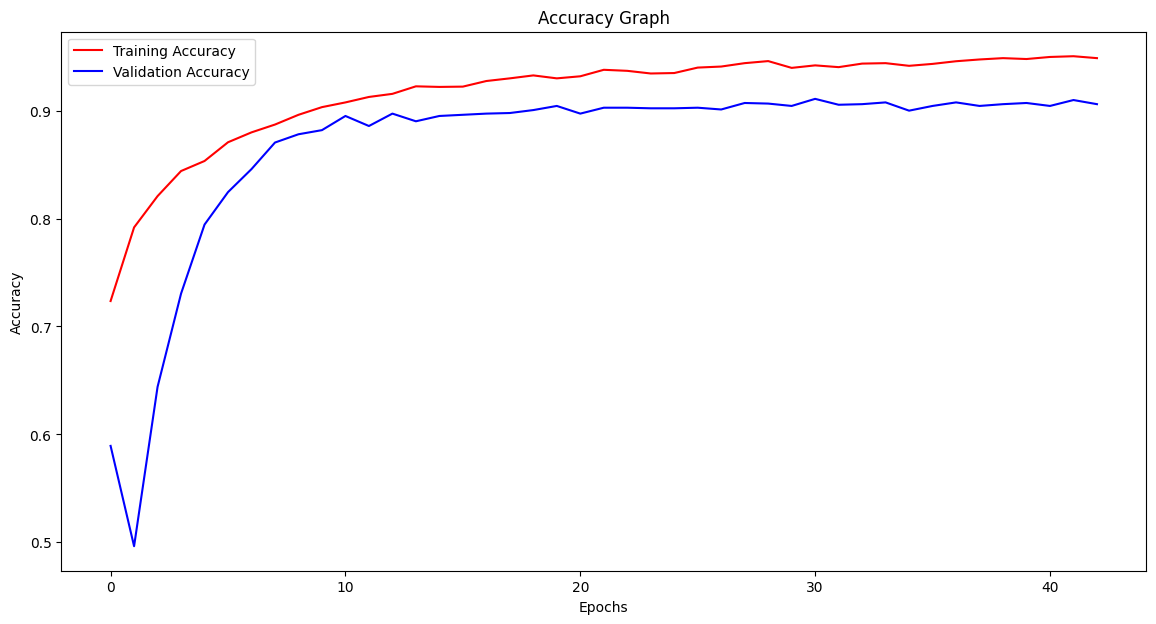

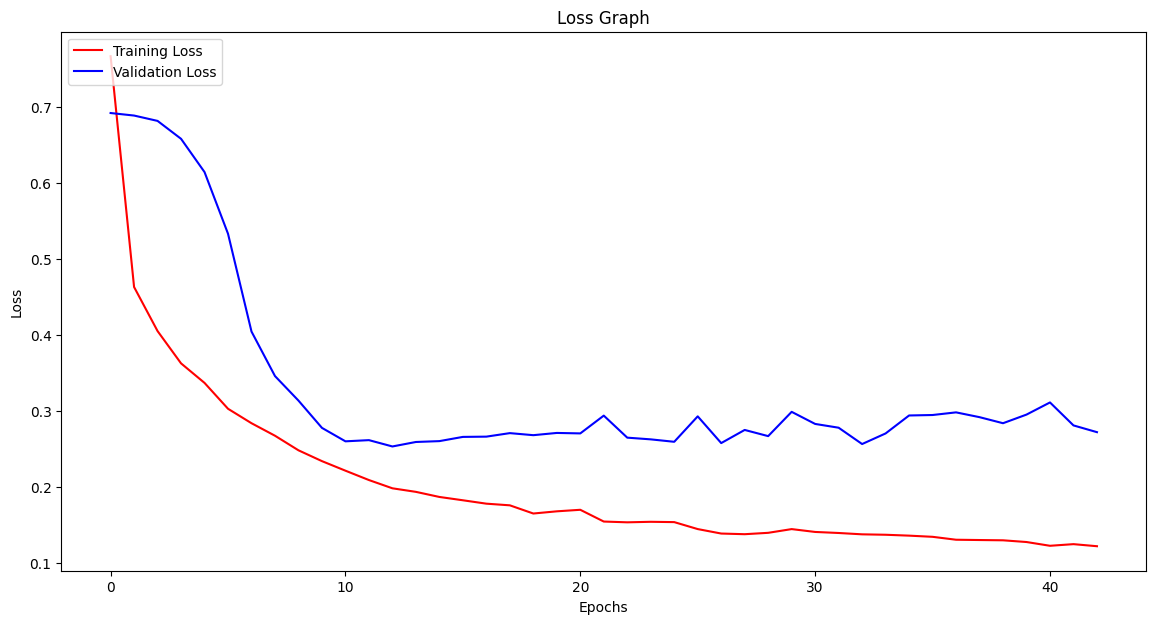

72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


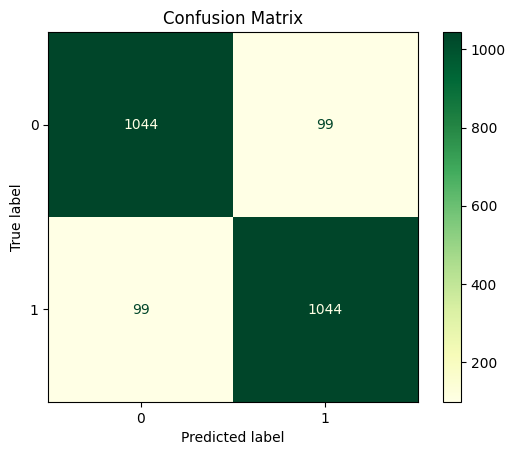

In [28]:
eval_graph(CNN_results_2)
conf_matrix(X_test2, Y_test2, CNN_model2)

In [32]:
from tensorflow import keras
from tensorflow.keras import layers

def improved_CNN_LSTM(input_size):
    model = keras.Sequential()
    model.add(layers.Input(input_size))

    # Convolutional layers
    model.add(layers.Conv1D(filters=32, kernel_size=3, activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling1D(pool_size=2, padding='same'))
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv1D(filters=64, kernel_size=3, activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling1D(pool_size=2, padding='same'))
    model.add(layers.Dropout(0.4))

    # LSTM for sequential learning
    model.add(layers.LSTM(units=128, return_sequences=False))
    model.add(layers.Dropout(0.4))

    # Fully connected layers
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(1, activation='sigmoid'))  # Binary classification

    return model

# Example input sizes (replace with actual values)
input_size1 = (100, 1)  # (timesteps, features)
input_size2 = (200, 1)  # (timesteps, features)

# Correct function name
CNN_LSTM_model1 = improved_CNN_LSTM(input_size1)
CNN_LSTM_model1.summary()

CNN_LSTM_model2 = improved_CNN_LSTM(input_size2)
CNN_LSTM_model2.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_16 (Conv1D)                   │ (None, 100, 32)             │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_16               │ (None, 100, 32)             │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_16 (MaxPooling1D)      │ (None, 50, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_25 (Dropout)                 │ (None, 50, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_17 (Conv1D)                   │ (None, 50, 64)              │           6,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_17               │ (None, 50, 64)              │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_17 (MaxPooling1D)      │ (None, 25, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_26 (Dropout)                 │ (None, 25, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 128)                 │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_27 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_28 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122,177 (477.25 KB)

 Trainable params: 121,985 (476.50 KB)

 Non-trainable params: 192 (768.00 B)

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_18 (Conv1D)                   │ (None, 200, 32)             │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_18               │ (None, 200, 32)             │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_18 (MaxPooling1D)      │ (None, 100, 32)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_29 (Dropout)                 │ (None, 100, 32)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_19 (Conv1D)                   │ (None, 100, 64)             │           6,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_19               │ (None, 100, 64)             │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_19 (MaxPooling1D)      │ (None, 50, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_30 (Dropout)                 │ (None, 50, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 128)                 │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_31 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_32 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122,177 (477.25 KB)

 Trainable params: 121,985 (476.50 KB)

 Non-trainable params: 192 (768.00 B)

In [33]:
CNN_LSTM_model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        'CNN_LSTM_MODEL_ON_FEATURE_EXTRACTED.keras',
        verbose=1,
        save_best_only=True
    ),
    tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        min_delta=0.001,
        patience=30,
        verbose=1
    )
]
CNN_LSTM_results_1 = CNN_LSTM_model1.fit(
    X_train1,
    Y_train1,
    validation_split=0.2,
    batch_size=128,
    epochs=200,
    callbacks=callbacks
)

Epoch 1/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5969 - loss: 0.6691
Epoch 1: val_loss improved from inf to 0.65644, saving model to CNN_LSTM_MODEL_ON_FEATURE_EXTRACTED.keras
58/58 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - accuracy: 0.5976 - loss: 0.6687 - val_accuracy: 0.6627 - val_loss: 0.6564
Epoch 2/200
54/58 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6621 - loss: 0.6160
Epoch 2: val_loss improved from 0.65644 to 0.64632, saving model to CNN_LSTM_MODEL_ON_FEATURE_EXTRACTED.keras
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.6634 - loss: 0.6153 - val_accuracy: 0.6692 - val_loss: 0.6463
Epoch 3/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7005 - loss: 0.5848
Epoch 3: val_loss improved from 0.64632 to 0.64318, saving model to CNN_LSTM_MODEL_ON_FEATURE_EXTRACTED.keras
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7004 - loss: 0.5849 - val_accuracy: 0.7250 - val_loss: 0.6432
Epoch 4/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.674

72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9213 - loss: 0.1891


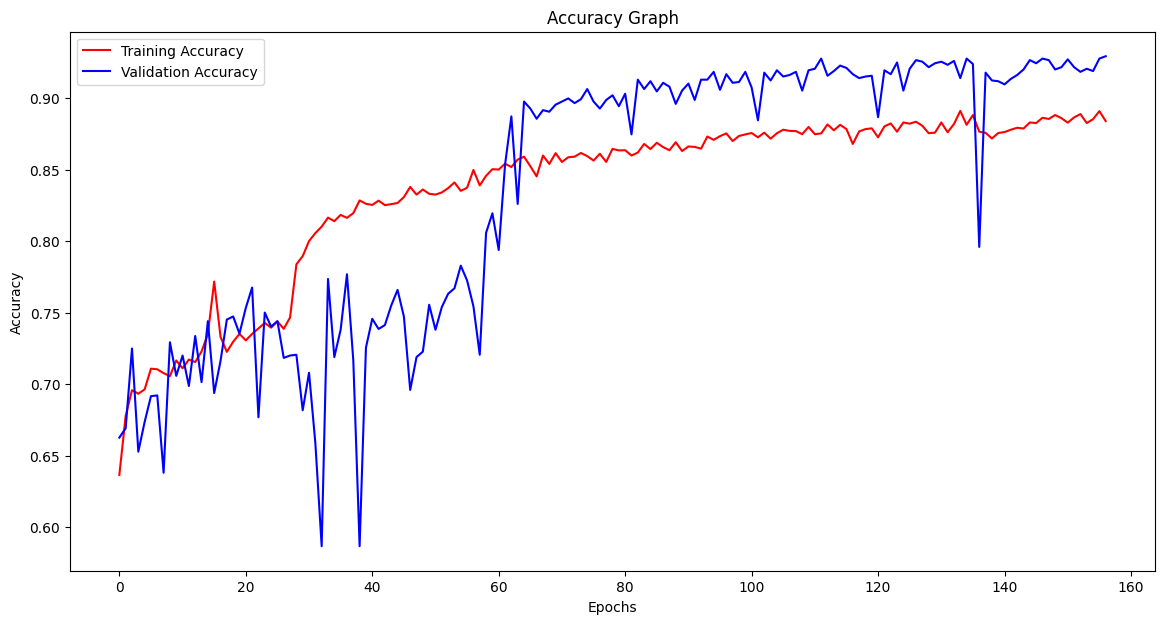

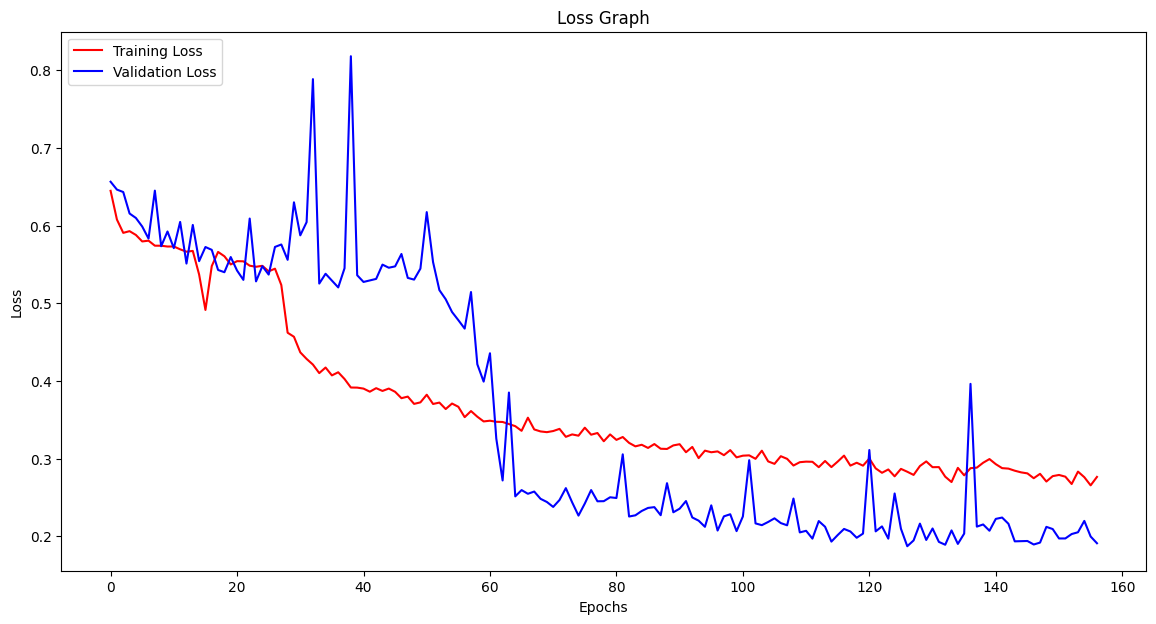

72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


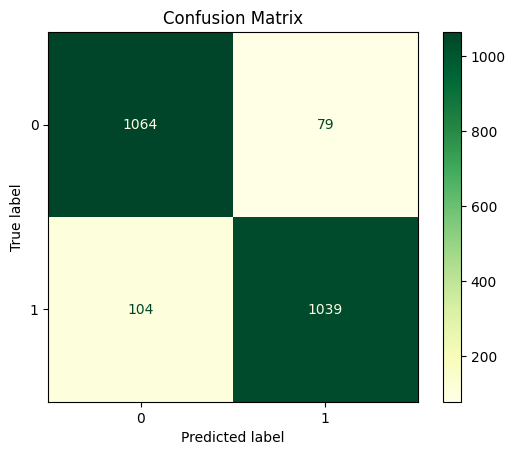

In [34]:
evaluation_results_1 = CNN_LSTM_model1.evaluate(X_test1, Y_test1)
eval_graph(CNN_LSTM_results_1)
conf_matrix(X_test1, Y_test1, CNN_LSTM_model1)

In [35]:
CNN_LSTM_model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
callbacks = [
    tf.keras.callbacks.ModelCheckpoint('CNN_LSTM_MODEL_ON_NON_FEATURE_EXTRACTED.keras', verbose=1, save_best_only=True),
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.001, patience=30, verbose=1)
]
CNN_LSTM_results_2 = CNN_LSTM_model2.fit(X_train2, Y_train2, validation_split=0.2, batch_size=128, epochs=200, callbacks=callbacks)

Epoch 1/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6860 - loss: 0.6203
Epoch 1: val_loss improved from inf to 0.68852, saving model to CNN_LSTM_MODEL_ON_NON_FEATURE_EXTRACTED.keras
58/58 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - accuracy: 0.6864 - loss: 0.6199 - val_accuracy: 0.5036 - val_loss: 0.6885
Epoch 2/200
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7573 - loss: 0.5373
Epoch 2: val_loss improved from 0.68852 to 0.66754, saving model to CNN_LSTM_MODEL_ON_NON_FEATURE_EXTRACTED.keras
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.7574 - loss: 0.5371 - val_accuracy: 0.6047 - val_loss: 0.6675
Epoch 3/200
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7751 - loss: 0.5123
Epoch 3: val_loss improved from 0.66754 to 0.65847, saving model to CNN_LSTM_MODEL_ON_NON_FEATURE_EXTRACTED.keras
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.7750 - loss: 0.5124 - val_accuracy: 0.6020 - val_loss: 0.6585
Epoch 4/200
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - ac

72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7925 - loss: 0.4772


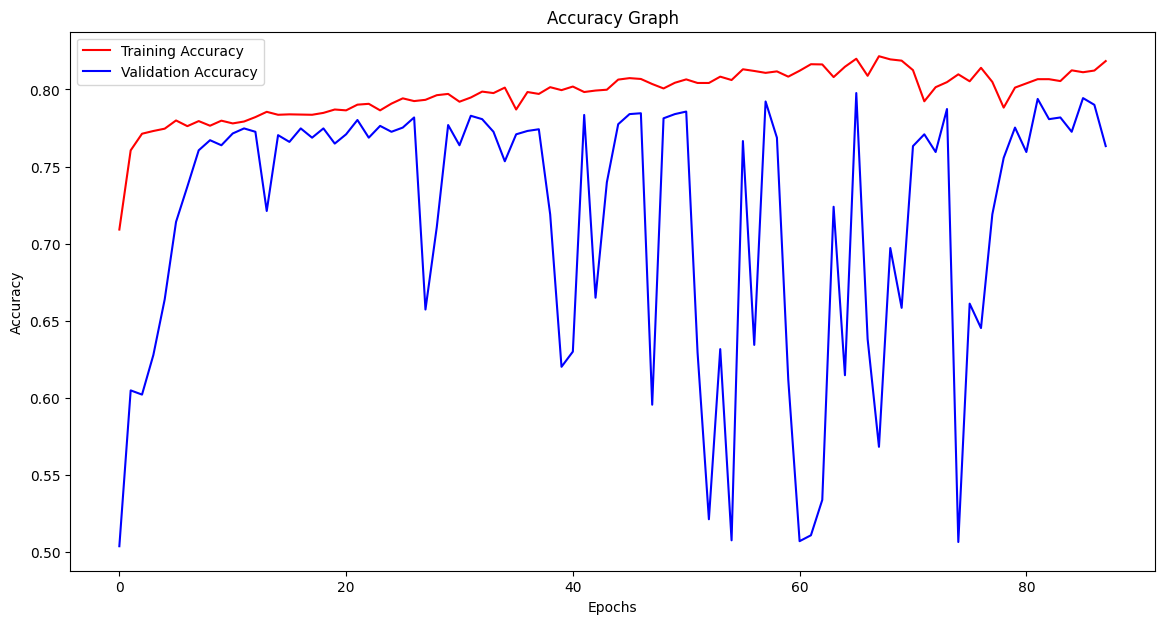

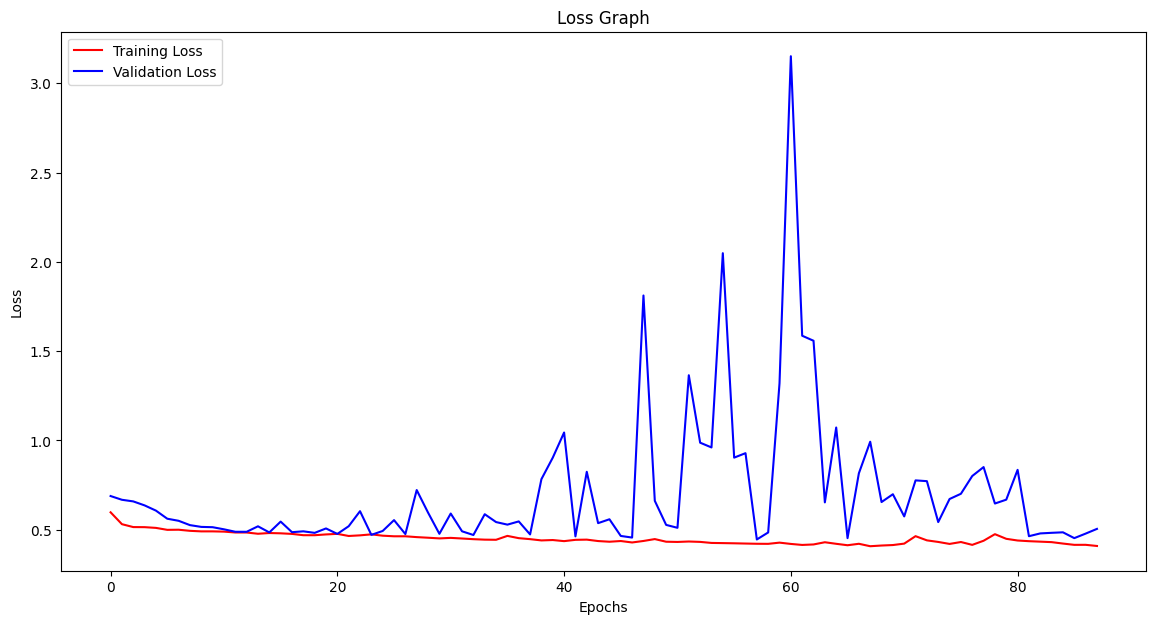

72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


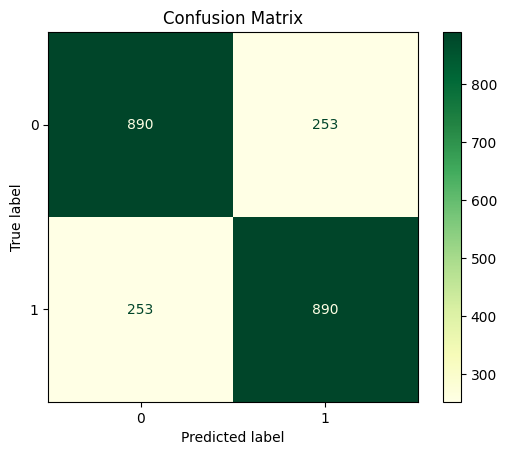

In [36]:
evaluation_results_2 = CNN_LSTM_model2.evaluate(X_test2, Y_test2)
eval_graph(CNN_LSTM_results_2)
conf_matrix(X_test2, Y_test2, CNN_LSTM_model2)